In [1]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat

In [2]:
import datetime 
path = 'C:/Users/tyron/Documents/Geoscience/weather/pton3070.18__ASC_ASCIIIn.mrk'
x = np.loadtxt(path,dtype = str,  skiprows = 1, usecols = 0)
new = np.array(x)
y = np.loadtxt(path,dtype = float, skiprows = 1, usecols = np.arange(1,8))
print(y)

[[1.6600e+02 5.6000e+00 1.8800e+01 ... 9.9690e-01 2.0000e-02 0.0000e+00]
 [2.2100e+02 3.1000e+00 1.8800e+01 ... 9.9670e-01 2.0000e-02 0.0000e+00]
 [1.8400e+02 3.9000e+00 1.8800e+01 ... 9.9670e-01 1.0000e-02 0.0000e+00]
 ...
 [2.5700e+02 1.2000e+00 1.0900e+01 ... 1.0141e+00 0.0000e+00 0.0000e+00]
 [1.6700e+02 3.0000e-01 1.0900e+01 ... 1.0141e+00 0.0000e+00 0.0000e+00]
 [2.8400e+02 1.5000e+00 1.0900e+01 ... 1.0142e+00 0.0000e+00 0.0000e+00]]


In [3]:
# How to convert the string into a usable date time. This is ISO8601 format.
print(new[0])
type(new[0])
t = datetime.datetime.strptime(new[0], "%Y-%m-%dT%H:%M:%SZ")
print(t)

2018-11-02T23:59:42Z
2018-11-02 23:59:42


In [4]:
# Extracting what we need, x has  
precip = np.zeros(100)
inten = np.zeros(100)
nonprecip = np.zeros(100)
prec= 0
nonprec = 0
i = 0
# Going through the time(minutes)
while (i < 1440):
    hold = y[i][5]
    # Condition where we have no precipitation
    if (hold == 0):
        nonprecip[nonprec] += 1
        if (y[i][5] != y[i-1][5] and y[i][5] == 0 and y[i-1][5] > 0):
                prec += 1
    # Condition where we have precipitation    
    if (hold > 0):
        precip[prec] += 1
        inten[prec] += hold
        # How to account for new precip events
        if (i >= 1):
            # Don't iterate prec if it is the first precip event
            if (y[i][5] != y[i-1][5] and y[i][5] > 0 and y[i-1][5] == 0):
                nonprec += 1
    i = i+1

In [5]:
print(precip)

[ 3.  1.  1.  1.  1.  1.  1.  1. 10.  2.  1.  2.  7.  1.  2.  1.  1.  1.
  1.  1.  1.  2.  5.  3.  1. 27. 77.  6.  7. 39.  2. 27.  5.  2.  1. 17.
  1.  5.  5.  5.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [6]:
print(inten)

[0.05 0.01 0.01 0.01 0.03 0.01 0.01 0.01 0.63 0.06 0.01 0.02 0.24 0.01
 0.02 0.01 0.01 0.01 0.01 0.02 0.01 0.02 0.05 0.05 0.01 2.1  8.08 0.19
 0.1  1.26 0.02 0.72 0.12 0.03 0.01 0.84 0.01 0.54 0.06 0.05 0.01 0.02
 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [7]:
print(nonprecip)

[  2.   1.   1.   5.   7.  37.   5.   2.   4.   5.   1.   9.   2.   2.
   3.  71.   4.  23.  16.  14.   2.   4.   3.   3.   1.   2.   3.   1.
   4.   5.   2.   1.   1.   1.   1.   3.  19.   6.  22. 240.   1. 278.
 342.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


In [8]:
path2 = 'C:/Users/tyron/Documents/Geoscience/weather/pton3080.18__ASC_ASCIIIn.mrk'
day308018 = np.loadtxt(path2,dtype = str,  skiprows = 1, usecols = 0)
newday = np.array(day308018)
actualval = np.loadtxt(path2,dtype = float, skiprows = 1, usecols = np.arange(1,8))
print(actualval)

[[289.       1.1     10.9    ...   1.0142   0.       0.    ]
 [294.       1.6     10.9    ...   1.0142   0.       0.    ]
 [246.       1.1     10.9    ...   1.0142   0.       0.    ]
 ...
 [108.       1.3      9.4    ...   1.0227   0.       0.    ]
 [148.       0.8      9.4    ...   1.0227   0.       0.    ]
 [ 88.       1.3      9.5    ...   1.0228   0.       0.    ]]


In [9]:
precip1 = np.zeros(50)
nonprecip1 = np.zeros(50)
inten1 = np.zeros(50)
prec1 = 0
nonprec1 = 0
j = 0
while (j < 1440):
    hold = actualval[j][5]
    # Condition where we have no precipitation
    if (hold == 0):
        nonprecip1[nonprec1] += 1
        if (j >= 1):
            holdbefore = actualval[j-1][5]
            if (hold != holdbefore and hold == 0 and holdbefore > 0):
                prec1 += 1
    # Condition where we have precipitation    
    if (hold > 0):
        precip1[prec1] += 1
        inten1[prec1] += hold
        # How to account for new precip events
        if (j >= 1):
            holdbefore = actualval[j-1][5]
            # Don't iterate prec if it is the first precip event
            if (hold != holdbefore and hold > 0 and holdbefore == 0):
                nonprec1 += 1
    j = j+1

In [10]:
print(precip1)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [11]:
newy = np.array(y)
newactualval = np.array(actualval)
a = np.concatenate((y, actualval))
print(a)

[[1.6600e+02 5.6000e+00 1.8800e+01 ... 9.9690e-01 2.0000e-02 0.0000e+00]
 [2.2100e+02 3.1000e+00 1.8800e+01 ... 9.9670e-01 2.0000e-02 0.0000e+00]
 [1.8400e+02 3.9000e+00 1.8800e+01 ... 9.9670e-01 1.0000e-02 0.0000e+00]
 ...
 [1.0800e+02 1.3000e+00 9.4000e+00 ... 1.0227e+00 0.0000e+00 0.0000e+00]
 [1.4800e+02 8.0000e-01 9.4000e+00 ... 1.0227e+00 0.0000e+00 0.0000e+00]
 [8.8000e+01 1.3000e+00 9.5000e+00 ... 1.0228e+00 0.0000e+00 0.0000e+00]]


In [12]:
precip1 = np.zeros(50)
nonprecip1 = np.zeros(50)
inten1 = np.zeros(50)
prec1 = 0
nonprec1 = 0
k = 0
while (k < 2880):
    hold = a[k][5]
    # Condition where we have no precipitation
    if (hold == 0):
        nonprecip1[nonprec1] += 1
        if (k >= 1):
            holdbefore = a[k-1][5]
            if (hold != holdbefore and hold == 0 and holdbefore > 0):
                prec1 += 1
    # Condition where we have precipitation    
    if (hold > 0):
        precip1[prec1] += 1
        inten1[prec1] += hold
        # How to account for new precip events
        if (k >= 1):
            holdbefore = a[k-1][5]
            # Don't iterate prec if it is the first precip event
            if (hold != holdbefore and hold > 0 and holdbefore == 0):
                nonprec1 += 1
    k = k+1

In [13]:
print(precip1)

[ 3.  1.  1.  1.  1.  1.  1.  1. 10.  2.  1.  2.  7.  1.  2.  1.  1.  1.
  1.  1.  1.  2.  5.  3.  1. 27. 77.  6.  7. 39.  2. 27.  5.  2.  1. 17.
  1.  5.  5.  5.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]


In [14]:
print(nonprecip1)

[2.000e+00 1.000e+00 1.000e+00 5.000e+00 7.000e+00 3.700e+01 5.000e+00
 2.000e+00 4.000e+00 5.000e+00 1.000e+00 9.000e+00 2.000e+00 2.000e+00
 3.000e+00 7.100e+01 4.000e+00 2.300e+01 1.600e+01 1.400e+01 2.000e+00
 4.000e+00 3.000e+00 3.000e+00 1.000e+00 2.000e+00 3.000e+00 1.000e+00
 4.000e+00 5.000e+00 2.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 3.000e+00 1.900e+01 6.000e+00 2.200e+01 2.400e+02 1.000e+00 2.780e+02
 1.171e+03 6.100e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]


In [15]:
print(inten1)

[0.05 0.01 0.01 0.01 0.03 0.01 0.01 0.01 0.63 0.06 0.01 0.02 0.24 0.01
 0.02 0.01 0.01 0.01 0.01 0.02 0.01 0.02 0.05 0.05 0.01 2.1  8.08 0.19
 0.1  1.26 0.02 0.72 0.12 0.03 0.01 0.84 0.01 0.54 0.06 0.05 0.01 0.02
 0.01 0.02 0.   0.   0.   0.   0.   0.  ]


In [16]:
# Start consolidating datasets from different years
data2017 = 0
data2018 = 0
data2019 = 0
data2020 = 0
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'

# Note 2018 and 2019 have data for all 365 days in the year. 
# 2017 is part of the year, 2020 is a leap year as well as still ongoing. 
# Tackle 2017 first
for i in range(0,169):
    day = i + 197
    if (day < 10):
        holdstr = 'pton00' + str(day) + '0.17'
    elif (day < 100):
        holdstr ='pton0' + str(day) +'0.17'
    else: 
        holdstr = 'pton' + str(day) + '0.17'
        
    path = direct + holdstr + ASC
    if (day == 197):
        data2017 = np.array(np.loadtxt(path, dtype = float, skiprows = 1, usecols = np.arange(1,8)))
        print(data2017)
    else: 
        hold = np.array(np.loadtxt(path, dtype = float, skiprows = 1, usecols = np.arange(1,8)))
        data2017 = np.concatenate((data2017, hold))
    print(day)

[[2.9600e+02 2.0000e-01 2.6300e+01 ... 1.0039e+00 0.0000e+00 0.0000e+00]
 [9.3000e+01 4.0000e-01 2.6300e+01 ... 1.0039e+00 0.0000e+00 0.0000e+00]
 [3.5700e+02 1.8000e+00 2.6200e+01 ... 1.0039e+00 0.0000e+00 0.0000e+00]
 ...
 [4.0000e+00 2.0000e-01 2.8300e+01 ... 1.0057e+00 0.0000e+00 0.0000e+00]
 [3.0700e+02 1.0000e-01 2.8300e+01 ... 1.0057e+00 0.0000e+00 0.0000e+00]
 [1.5000e+02 2.0000e-01 2.8300e+01 ... 1.0057e+00 0.0000e+00 0.0000e+00]]
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213


IndexError: list index out of range

In [17]:
for i in range(0,365):
    day = i + 1
    if (day < 10):
        holdstr = 'pton00' + str(day) + '0.18'
    elif (day < 100):
        holdstr ='pton0' + str(day) +'0.18'
    else: 
        holdstr = 'pton' + str(day) + '0.18'
        
    path = direct + holdstr + ASC
    if (day == 1):
        data2018 =np.loadtxt(path, dtype = float, skiprows = 1, usecols = np.arange(1,8))
        print(data2017)
    else: 
        hold = np.loadtxt(path, dtype = float, skiprows = 1, usecols = np.arange(1,8))
        data2018 = np.concatenate((data2018, hold))
    print(i)

[[2.9600e+02 2.0000e-01 2.6300e+01 ... 1.0039e+00 0.0000e+00 0.0000e+00]
 [9.3000e+01 4.0000e-01 2.6300e+01 ... 1.0039e+00 0.0000e+00 0.0000e+00]
 [3.5700e+02 1.8000e+00 2.6200e+01 ... 1.0039e+00 0.0000e+00 0.0000e+00]
 ...
 [2.5800e+02 2.4000e+00 2.7100e+01 ... 1.0080e+00 0.0000e+00 0.0000e+00]
 [2.3000e+02 3.2000e+00 2.7100e+01 ... 1.0080e+00 0.0000e+00 0.0000e+00]
 [2.4100e+02 2.9000e+00 2.7200e+01 ... 1.0080e+00 0.0000e+00 0.0000e+00]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


IndexError: list index out of range

In [18]:
for i in range(0,365):
    day = i + 1
    if (day < 10):
        holdstr = 'pton00' + str(day) + '0.19'
    elif (day < 100):
        holdstr ='pton0' + str(day) +'0.19'
    else: 
        holdstr = 'pton' + str(day) + '0.19'
        
    path = direct + holdstr + ASC
    if (day == 1):
        data2019 =np.loadtxt(path, dtype = float, skiprows = 1, usecols = np.arange(1,8))
        print(data2019)
    elif (day != 182 and day!=190 and day!=199 and day != 210 and day !=212 and day !=213 and day != 222): 
        hold = np.loadtxt(path, dtype = float, skiprows = 1, usecols = np.arange(1,8))
        data2019 = np.concatenate((data2019, hold))
    print(day)

[[117.       1.8      6.1    ...   1.0095   0.       0.    ]
 [ 94.       1.4      6.1    ...   1.0095   0.       0.    ]
 [123.       1.       6.1    ...   1.0094   0.       0.    ]
 ...
 [275.       1.4      8.     ...   1.0106   0.       0.    ]
 [  6.       0.5      8.     ...   1.0106   0.       0.    ]
 [336.       1.1      7.9    ...   1.0106   0.       0.    ]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184


In [158]:
for i in range(0, 265):
    day = i +1
    if (day < 10):
        holdstr = 'pton00' + str(day) + '0.20'
    elif (day < 100):
        holdstr ='pton0' + str(day) +'0.20'
    else: 
        holdstr = 'pton' + str(day) + '0.20'
    path = direct + holdstr + ASC
    if (day == 1):
        data2020 =np.genfromtxt(path, dtype = float, skip_header = 1, usecols = np.arange(1,8))
        print(data2020)
    else: #( day != 143 and day != 164 and day != 175 and day != 187 and day != 197): 
        hold = np.genfromtxt(path, dtype = float, skip_header = 1, usecols = np.arange(1,8), missing_values = '  ', filling_values = np.nan)
        data2020 = np.concatenate((data2020, hold))
    print(day)
    

[[234.       2.4      6.4    ...   0.9945   0.       0.    ]
 [214.       3.7      6.4    ...   0.9945   0.       0.    ]
 [193.       4.       6.4    ...   0.9945   0.       0.    ]
 ...
 [272.       1.5      1.4    ...   1.003    0.       0.    ]
 [286.       2.2      1.4    ...   1.003    0.       0.    ]
 [259.       0.9      1.4    ...   1.003    0.       0.    ]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142


ValueError: Some errors were detected !
    Line #834 (got 1 columns instead of 7)

In [108]:
precip2020 = np.zeros(20000)
nonprecip2020 = np.zeros(20000)
inten2020 = np.zeros(20000)
prec = 0
nonprec = 0
k = 0
while (k < 204480):
    hold = data2020[k][5]
    # Condition where we have no precipitation
    if (hold == 0):
        nonprecip2020[nonprec] += 1
        if (k >= 1):
            holdbefore = data2020[k-1][5]
            if (hold != holdbefore and hold == 0 and holdbefore > 0):
                prec += 1
    # Condition where we have precipitation    
    if (hold > 0):
        precip2020[prec] += 1
        inten2020[prec] += hold
        # How to account for new precip events
        if (k >= 1):
            holdbefore = data2020[k-1][5]
            # Don't iterate prec if it is the first precip event
            if (hold != holdbefore and hold > 0 and holdbefore == 0):
                nonprec += 1
    k = k+1

In [109]:
print(nonprecip2020)

[3435.   43.    9. ...    0.    0.    0.]


In [110]:
print(precip2020)

[1. 1. 1. ... 0. 0. 0.]


(array([682., 243., 103.,  87.,  50.,  39.,  32.,  23.,  24.,   9.]),
 array([ 0.1 ,  1.09,  2.08,  3.07,  4.06,  5.05,  6.04,  7.03,  8.02,
         9.01, 10.  ]),
 <a list of 10 Patch objects>)

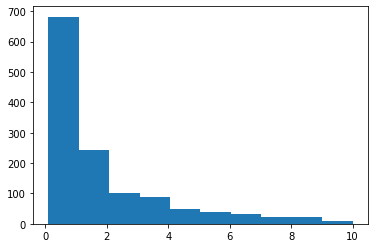

In [132]:
plt.hist(nonprecip2020, bins = 10, range = (0.1, 10))

(array([1085.,  214.,  100.,   65.,   35.,   28.,   25.,   11.,   14.,
          22.]),
 array([ 0.1 ,  1.09,  2.08,  3.07,  4.06,  5.05,  6.04,  7.03,  8.02,
         9.01, 10.  ]),
 <a list of 10 Patch objects>)

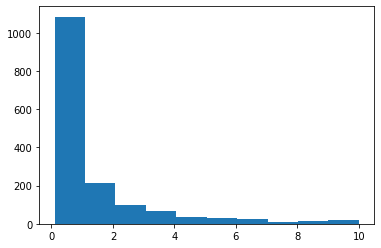

In [131]:
plt.hist(precip2020, bins = 10, range = (0.1, 10))

(array([1.507e+03, 7.900e+01, 2.600e+01, 1.400e+01, 1.000e+01, 1.000e+01,
        5.000e+00, 5.000e+00, 6.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        4.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <a list of 50 Patch objects>)

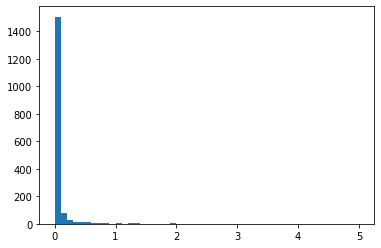

In [138]:
plt.hist(inten2020[inten2020 != 0], bins = 50, range = (0,5))

In [166]:
precip2019 = np.zeros(20000)
nonprecip2019 = np.zeros(20000)
inten2019 = np.zeros(20000)
prec = 0
nonprec = 0
k = 0
while (k < 515507):
    hold = data2019[k][5]
    # Condition where we have no precipitation
    if (hold == 0):
        nonprecip2019[nonprec] += 1
        if (k >= 1):
            holdbefore = data2019[k-1][5]
            if (hold != holdbefore and hold == 0 and holdbefore > 0):
                prec += 1
    # Condition where we have precipitation    
    if (hold > 0):
        precip2019[prec] += 1
        inten2019[prec] += hold
        # How to account for new precip events
        if (k >= 1):
            holdbefore = data2019[k-1][5]
            # Don't iterate prec if it is the first precip event
            if (hold != holdbefore and hold > 0 and holdbefore == 0):
                nonprec += 1
    k = k+1

In [165]:
data2019.shape


(515507, 7)

(array([390.,  56.,  19.,  18.,  12.,   6.,   6.,   8.,   2.,   3.]),
 array([ 0.1 ,  1.09,  2.08,  3.07,  4.06,  5.05,  6.04,  7.03,  8.02,
         9.01, 10.  ]),
 <a list of 10 Patch objects>)

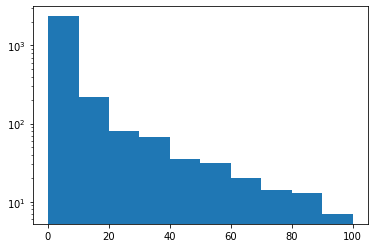

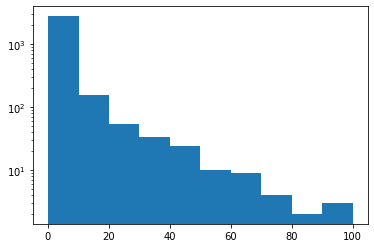

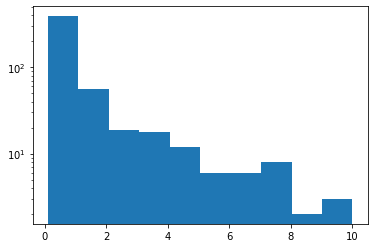

In [172]:
plt.figure(1)
plt.hist(nonprecip2019, bins = 10, range = (0.1, 100), log = True)
plt.figure(2)
plt.hist(precip2019, bins = 10, range=(0.1, 100), log = True)
plt.figure(3)
plt.hist(inten2019, bins= 10, range=(0.1, 10), log = True)

In [ ]:
# Create functions that make it easy to generate these stats and start writing this for thesis. (Methods)
plt.figure(figsize = (10,8))
plt.plot(date2019,data2019[:,2])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001A777788C80> (for post_execute):


KeyboardInterrupt: 

In [20]:
date2019 = 0
for i in range(0,365):
    day = i + 1
    if (day < 10):
        holdstr = 'pton00' + str(day) + '0.19'
    elif (day < 100):
        holdstr ='pton0' + str(day) +'0.19'
    else: 
        holdstr = 'pton' + str(day) + '0.19'
        
    path = direct + holdstr + ASC
    if (day == 1):
        date2019 =np.loadtxt(path, dtype = str,  skiprows = 1, usecols = 0)
        print(data2019)
    elif (day != 182 and day!=190 and day!=199 and day != 210 and day !=212 and day !=213 and day != 222): 
        hold = np.loadtxt(path, dtype = str,  skiprows = 1, usecols = 0)
        date2019 = np.concatenate((date2019, hold))
    print(day)

[[117.       1.8      6.1    ...   1.0095   0.       0.    ]
 [ 94.       1.4      6.1    ...   1.0095   0.       0.    ]
 [123.       1.       6.1    ...   1.0094   0.       0.    ]
 ...
 [209.       4.6      6.4    ...   0.9945   0.       0.    ]
 [214.       1.5      6.4    ...   0.9945   0.       0.    ]
 [233.       1.7      6.4    ...   0.9945   0.       0.    ]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184


In [26]:
date2019.shape
n = len(np.array(date2019))
#date_2019 = datetime.datetime.strptime(date2019, "%Y-%m-%dT%H:%M:%SZ")

In [27]:
for i in range(0,n):
    hold = date2019[i]
    change = datetime.datetime.strptime(hold, "%Y-%m-%dT%H:%M:%SZ")
    date2019[i] = change

In [8]:
path = 'C:/Users/tyron/Documents/Geoscience/weather/pton2640.20__ASC_ASCIIIn.mrk'
x = np.loadtxt(path,dtype = str,  skiprows = 1, usecols = 0)
new = np.array(x)
y = np.loadtxt(path,dtype = float, skiprows = 1, usecols = np.arange(1,8))

In [4]:
for i in range(0, 1440):
    hold = x[i]
    change = datetime.datetime.strptime(hold, "%Y-%m-%dT%H:%M:%SZ")
    x[i] = change

In [ ]:

plt.plot(x, y[:, 2])
plt.autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')

Text(0.5, 1.0, 'The temperature of Princeton, NJ from 9-19-2020 to 9-20-2020')

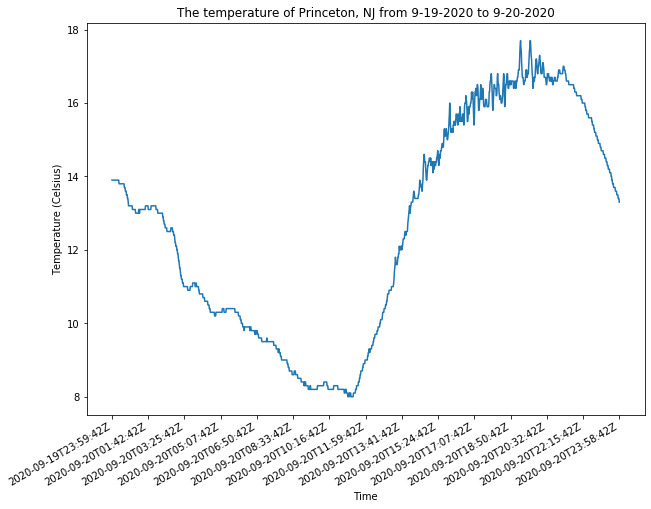

In [26]:
plt.figure(figsize = (10,8))
plt.plot(x, y[:, 2])
plt.gcf().autofmt_xdate()
plt.xticks(ticks = np.linspace(0,1439,15))
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title('The temperature of Princeton, NJ from 9-19-2020 to 9-20-2020')